
## مجموعه داده های اسنپفود
  مجموعه داده جمع آوری شده حاوی لیست اسامی رستوران‌ها و کافه‌های شهر تهران به همراه لیست منوی هر کدام می‌باشد. برای هر رستوران میانگین امتیاز و تعداد رای‌های داده شده توسط مشتریان و برای هر آیتم در لیست منو قیمت آن  ذخیره شده است. 

  تحلیل‌های انجام شده در این پروژه شامل توصیف داده‌ها، تحلیل رابطه بین امتیاز و قیمت، ابر کلمات، خوشه بندی رستوران‌ها و تخمین قیمت غذاها می‌باشد.

جدول زیر بخشی از منوی رستوران پیتزا سیب 360 در منطقه دیباجی را نمایش می‌دهد.


In [11]:
import pandas as pd
df = pd.read_csv('./snappfood_resturants.csv')
df.head()

,ID,resturant,voteCount,rating,price,productTitle
0,1.0,جوجه داغ (Hot Chick),29733,4.3,199000,پیتزا اسفناج یک نفره (26 سانتی متری)
1,1.0,جوجه داغ (Hot Chick),29733,4.3,255000,پیتزا مخصوص آمریکایی یک نفره (26 سانتی متری)
2,1.0,جوجه داغ (Hot Chick),29733,4.3,199000,پیتزا اسفناج یک نفره (26 سانتی متری)
3,1.0,جوجه داغ (Hot Chick),29733,4.3,320000,پیتزا سبزیجات پنجره ای دو نفره (32*27 سانتی متری)
4,1.0,جوجه داغ (Hot Chick),29733,4.3,370000,پیتزا چهار طعم پنجره ای دو نفره (32*27 سانتی م...


# توصیف داده‌ها
 در جدول زیر یک توصیف آماری از داده‌ها ارائه شده است. همانطور که مشخص است حدود دو هزار و دویست رستوران در مجموعه داده موجود است. میانگین نظر کاربران برای رستورانها 4.2 بوده و گرانترین غذا حدود بیست میلیون تومان بوده است که احتمالا یکه داده پرت یا نویزی است (احتمالا به اشتباه به ریال وارد شده است). میانگین قیمت محصولات (غذا، نوشیدنی، مخلفات و ...) 80 هزار تومان است.

In [12]:
df.describe()

,ID,voteCount,rating,price
count,149170.000000,149170.000000,149170.000000,1.491700e+05
mean,814.045941,12671.308313,4.274286,1.273037e+05
std,579.389702,16289.549302,0.267883,2.118849e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,330.000000,3251.000000,4.100000,2.950000e+04
50%,729.000000,7164.000000,4.300000,8.000000e+04
75%,1226.000000,16941.000000,4.400000,1.750000e+05
max,2211.000000,123627.000000,5.000000,2.800000e+07


----
نمایش توزیع امتیازدهی کاربران به رستوران‌های مختلف در زیر ارائه شده است. هماهنطور که مشخص است، اکثر رستوران‌ها امتیازی حدود 4.2 داشته‌اند و رستورانهایی با امتیاز کم فراوانی بالایی ندارند.

Text(0, 0.5, 'Frequency in data')

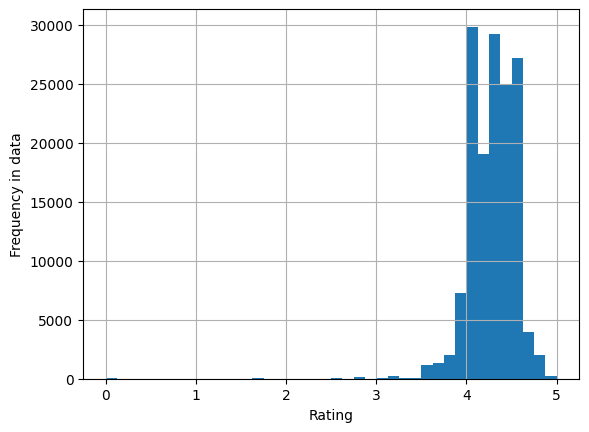

In [126]:
rating_price = df[['rating','price']]
rating_price = rating_price[rating_price['price']<3e6]
axes = rating_price['rating'].hist(bins=40)
axes.set_xlabel("Rating")
axes.set_ylabel("Frequency in data")

----
نمودار توزیع قیمت که به صورت یک توزیع "دم بلند" است. درواقع میتوان گفت که چولگی شدید در توزیع داده‌ها به چپ وجود دارد


Text(0, 0.5, 'Frequency in data')

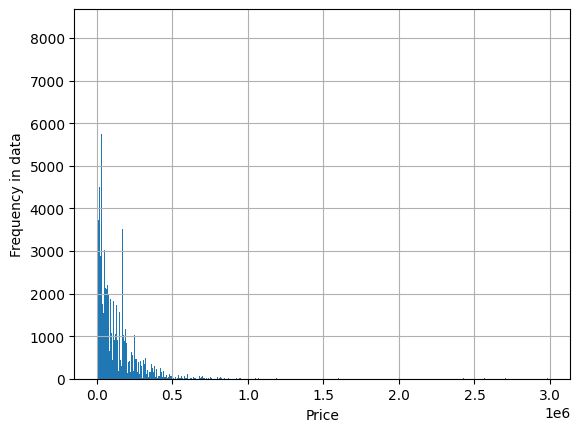

In [125]:
axes = rating_price['price'].hist(bins=1000)
axes.set_xlabel("Price")
axes.set_ylabel("Frequency in data")

----
در اینجا بررسی می‌کنیم که آیا رابطه‌ای بین قیمت و امتیازدهی کاربران وجود دارد یا خیر. برای این منظور ابتدا یک رسترپلات از این دو متغیر نمایش می‌دهیم.

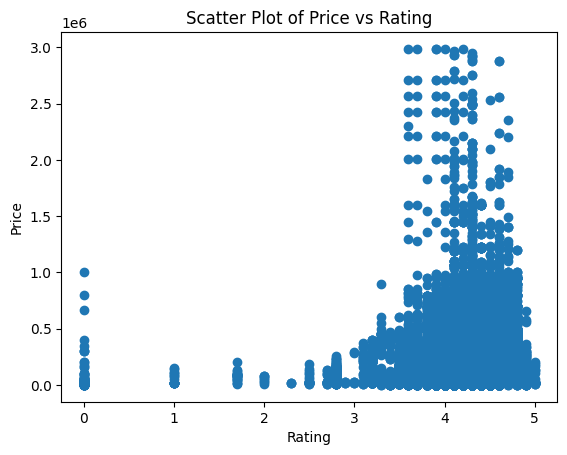

In [128]:
import matplotlib.pyplot as plt
plt.scatter(rating_price['rating'],rating_price['price'])
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs Rating")
plt.show()

به صورت بصری به نظر می‌رسد که غذاهای با امتیاز بیشتر قیمت بیشتری دارند. برای بررسی این موضوع ازضریب همبستگی استفاده می‌کنیم.
در ادامه هر دو هملستگی پیرسون و اسپیرمن را محاسبه نموده‌ایم. که طبق هیچکدام از این دو معیار، همبستگی معناداری بین امتیاز یک غذا و قیمت آن وجود ندارد.

In [130]:
import scipy.stats
corr, pval = scipy.stats.pearsonr(rating_price['rating'],rating_price['price'])
print("The pearson correlation coefficient is", corr)
print("The p-value is", pval)
print("########")
corr, pval = scipy.stats.spearmanr(rating_price['rating'],rating_price['price'])
print("The spearman correlation coefficient is", corr)
print("The p-value is", pval)

The pearson correlation coefficient is 0.007943990844849185
The p-value is 0.002158471469803259
########
The spearman correlation coefficient is 0.015791351606165592
The p-value is 1.0740405528269757e-09


----
نمودار زیر زیر نیز نشان میدهد که رستورانهای با نرخ امتیاز حدود 3 و نیم قیمتهای بالاتری دارند. به عبارتی شاید بتوان گفت که قیمت بالا میتواند عاملی برای امتیاز پایین برای رستورانها باشد

Text(0.5, 1.0, 'Average Price for each rating')

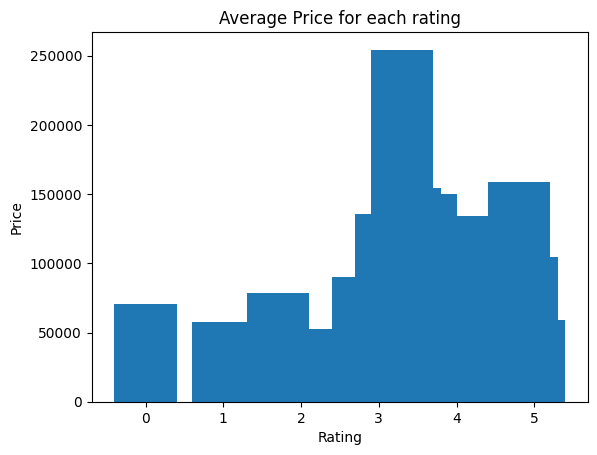

In [132]:
avg_price = rating_price.groupby("rating")["price"].mean()
plt.bar(avg_price.index, avg_price.values)
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Average Price for each rating")

در نمودار زیر ابر کلمات مربوط به منوی کلیه رستوران‌های موجود در مجوعه داده ارائه شده است. البته در ابتدا محصولات پرتکرا از قبیل نوشابه و ماءالشعیر از مجموعه منوها حذف شد. در این ابر کلمات غذاهایی چون چلو کباب، سوپ جو، پیتزا برجسته تر هستند.

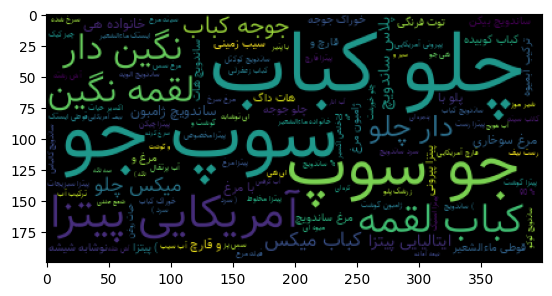

In [135]:
from wordcloud_fa import WordCloudFa
stop_words = set(['نوشابه','نوشابه بطری','شیشه ای','دی نوشابه', 'ماءالشعیر شیشه','قوطی','ماءالشعیر','بطری','خانواده','نوشابه قوطی','ماءالشعیر قوطی','هی دی','قوطی هی','نوشابه خانواده','قوطی نوشابه','دی ماءالشعیر','خانواده نوشابه','بطری نوشابه','ماءالشعیر خانواده'])
wordcloud = WordCloudFa(no_reshape=True,stopwords=stop_words)
text = ' '.join(df['productTitle'].dropna())
wc = wordcloud.generate(text)
image = wc.to_image()
image

##  خوشه‌بندی رستوران‌ها
در این تحلیل به خوشه‌بندی رستوران‌ها می پردازیم. بدین منظور ابتدا سطرهایی که خانه‌های خالی دارند را از مجموعه داده حذف میکنیم

In [3]:
df = df.dropna()

با توجه به اینکه محصولاتی مانند نوشابه‌ در اکثر رستوران‌ها وجود دارد و تاثییر چندانی در تعیین نوع رستوران ندارد. این نوع محصولات را از لیست محصولات حذف میکنیم.

In [4]:
mask = df['productTitle'].str.contains("نوشابه", case=False)
df = df[mask==False]
mask = df['productTitle'].str.contains("ماءالشعیر", case=False)
df = df[mask==False]
mask = df['productTitle'].str.contains("دوغ", case=False)
df = df[mask==False]

با توجه به اینکه اسامی رستوران‌ها یا کافه‌ها الزاما ارتباط مستقیمی با غذا یا محصولی که می‌فروشند ندارد. جهت انجام عملیات خوشه بندی، تمام آیتم‌های موجود در منوی هر رستوران را به اسم آن رستوران اضافه می‌کنیم.

In [5]:
products = df.groupby(['ID'])['productTitle'].transform(','.join)
resturants = df['resturant']
data = products+","+resturants

In [6]:
data = data.drop_duplicates()
data = data.dropna()

شکلی کلی داده‌ها به این صورت می‌باشد:

In [7]:
print(data[0:10])

0       پیتزا اسفناج یک نفره (26 سانتی متری),پیتزا مخص...
249     Efes هلو ,باواریا ساده,Efes سیب,Efes سیب,Efes ...
376     مینوت مید پرتقال,مینوت مید سیب,باواریا لیمو,با...
475     چلو کباب برگ گوساله (معمولی),خوراک جوجه کباب م...
572     چلو ماهی قزل آلا کبابی,چلو ماهی قزل آلا سرخ شد...
717     کشک بادمجان ۳۲۰ گرمی,آش رشته ۵۰۰ گرمی,آش رشته ...
845     زرشک پلو بازاری ران,زرشک پلو بازاری سینه,کترین...
865     پیتزا فیتکس مرغ و شوید 23*10 سانتی متری,پیتزا ...
1087    شله زرد الما 500 گرم,آش شله قلم کار پرسی (500 ...
1100    مینوت مید آلبالو,مینوت مید آلبالو,مینوت مید آل...
dtype: object


----
 برای استخراج ویژگی و تبدیل داده‌های متنی به فضای برداری می‌توان از الگوریتم‌های زیر استفاده کرد:
 * TFIDF Vectorizer
 * Count Vectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorized_documents = vectorizer.fit_transform(data)

در این مرحله با استفاده از الگوریتم خوشه بندی کا-میانگین رستورانها را به هفت خوشه، خوشه بندی می‌کنیم.

In [16]:
from sklearn.cluster import KMeans

num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, n_init=10,max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)
results = pd.DataFrame()
results['document'] = data
results['cluster'] = kmeans.labels_

به منظور شناسایی رستورانهایی که در خوشه‌های مختلف قرار گرفته‌اند. کلامتی که در هر خوشه مهمتر بوده‌اند را استخراج میکنیم.

In [28]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for j in order_centroids[i, :20]:
        print(f" {terms[j]}", end=", ")
    print()

Cluster 0:
 لیتر,  میلی,  آب,  400,  500,  اسپرسو,  یک,  شیر,  250,  گرم,  ترکیب,  شیک,  بستنی,  پرتقال,  انبه,  آبمیوه,  موز,  350,  300,  آیس, 
Cluster 1:
 گرم,  کیلوگرم,  عدد,  500,  یک,  کیک,  تا,  با,  نان,  شیرینی,  مرغ,  نفره,  سالاد,  دلستر,  کیلو,  سیب,  برنج,  جو,  بامیه,  بسته, 
Cluster 2:
 تکه,  سوخاری,  اسپایسی,  نرمال,  مرغ,  کلاب,  سوشی,  سه,  دو,  اسلیم,  پیتزا,  فیله,  رول,  استریپس,  سینه,  چیکن,  سانتیمتری,  دبل,  دوبل,  کریسپی, 
Cluster 3:
 پیتزا,  سانتی,  متری,  آمریکایی,  نفره,  ایتالیایی,  دو,  23,  یک,  30,  قارچ,  32,  24,  فیتکس,  پپرونی,  مرغ,  ساندویچ,  28,  10,  گوشت, 
Cluster 4:
 ساندویچ,  سرد,  ساده,  پنیر,  داگ,  قارچ,  هات,  با,  سایز,  فلافل,  نفره,  کوکتل,  پیتزا,  کوچک,  ژامبون,  بندری,  بیکن,  مرغ,  باگت,  یک, 
Cluster 5:
 آش,  حلیم,  کیلوگرم,  رشته,  شله,  گرم,  یک,  کیلو,  قلمکار,  500,  سوپ,  جو,  پرسی,  عدسی,  معجون,  کباب,  دو,  مخصوص,  زرد,  نیم, 
Cluster 6:
 کباب,  سیخ,  جوجه,  چلو,  خوراک,  ران,  یک,  کوبیده,  گرمی,  پلو,  مرغ,  زعفرانی,  با

----
همانطور که مشخص است خوشه‌های مختلف به دسته‌های مختلف رستوران مرتبط هستند:
* خوشه 1: کافه و کافی شاپ و آبمیوه فروشی
* خوشه 2: شیرینی فروشی
* خوشه 3: سوخاری
* خوشه 4: پیتزا
* خوشه 5: ساندویچ و فست فود
* خوشه 6: آش و حلیم
* خوشه 7:  رستوران ایرانی (کباب و جویه و ...)

----

در ادامه با استفاده از تجزیه مولفه اصلی به نمایش توزیع کلاسترها در دو بعد میپردازیم. همانطور که مشخص است فضای ویژگی بسیار قوی بوده و رستورانهای مختلف به خوبی از هم جدا می‌شوند.

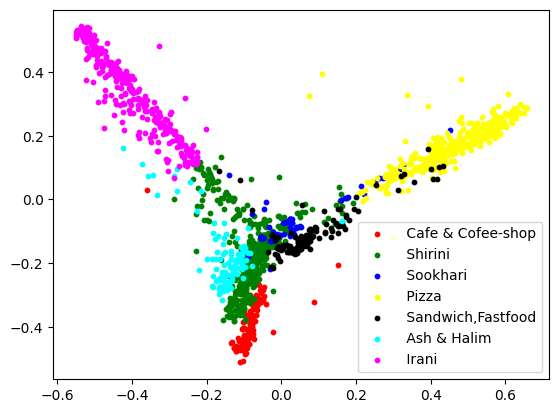

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())
# plot the results
colors = ['red', 'green','blue','yellow','black','cyan','magenta']
cluster = ['Cafe & Cofee-shop','Shirini','Sookhari','Pizza','Sandwich,Fastfood','Ash & Halim','Irani']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, c=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

## تخمین قیمت غذا با استفاده از رگرسیون خطی

در این تحلیل قسط داریم که قیمت غذای رستورانهای مختلف را بر اساس قیمت غذاهای مشابه در سایر رستوران‌ها تخمین بزنیم. این تحلیل میتواند برای ارائه پیشنهاد اولیه قیمت به رستورانهای جدید یا اعلام به مشتری جهت بررسی منصفانه بودن قیمت استفاده شود.

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('./snappfood_resturants2.csv')
df = df.dropna()

برای هر نام غذا، لیست سطرهایی از دیتا که متعلق به رستوران‌های مختلف هست را استخراج کرده و متوسط قیمت آن غذا را محاسبه می‌کنیم.

In [86]:
stop_words = ['ای', 'دی', 'شیشه', 'هی','نوشابه','نوشابه بطری','شیشه ای','دی نوشابه', 'ماءالشعیر شیشه','قوطی','ماءالشعیر','بطری','خانواده','نوشابه قوطی','ماءالشعیر قوطی','هی دی','قوطی هی','نوشابه خانواده','قوطی نوشابه','دی ماءالشعیر','خانواده نوشابه','بطری نوشابه','ماءالشعیر خانواده']
df = df[df['price']<1e6] # حذف غذاهایی که از 3 میلیون تومان بیشتر هستند
products = df['productTitle'].tolist()
prices = df["price"].tolist()
mean_prices = df.groupby('productTitle')['price'].transform('mean').tolist()

با استفاده از الگوریتم زیر مجددا استخراج ویژگی را انجام میدهیم

In [87]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(products)

داده‌ها را به داده‌های آموزشی و تست تقسیم کرده و سپس مدل رگرسیون خطی را روی داده‌های آموزشی آموزش داده و روی داده‌های تست ارزیابی می‌کنیم.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, mean_prices, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X, prices)

# new_product =  "برگر"
# new_X = vectorizer.transform([new_product])
# new_price = model.predict(new_X)
# print(f"The predicted average price of {new_product} is {new_price[0]:.2f}")

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")
X_test_names = vectorizer.inverse_transform(X_test)


Root Mean Squared Error: 49052.00
R-squared Score: 0.79


همانطور که مشخص شد میزان خطای کلی مدل حدود 49 هزار تومان است و معیار آر-2 حدود 0.8

در ادامه برای 10 محصول تست قیمت واقعی و پیش بینی شده را نمایش می‌دهیم. و همانطور که مشخص است مدل به شکل بسیار خوبی عمل کرده است. البته که ویژگی‌های استفاده شده بسیار کم است و اگر ویژگی‌های بیشتری استفاده شود ممکن است دقت بهبود یابد.

In [98]:
for i in range(10):
    print('اسم محصول:'," ".join(np.flip(X_test_names[i])))
    print('قیمت واقعی:',y_test[i])
    print('قیمت پیش بینی شده:',y_pred[i])
    print()


اسم محصول: پیتزا مخلوط
قیمت واقعی: 205608.1081081081
قیمت پیش بینی شده: 200472.74564452269

اسم محصول: آب توت فرنگی اناناس
قیمت واقعی: 70000.0
قیمت پیش بینی شده: 150067.36012639274

اسم محصول: صادراتی خرمای حلما
قیمت واقعی: 65000.0
قیمت پیش بینی شده: 64949.80093010289

اسم محصول: پیتزا استیک سیر ایتالیایی
قیمت واقعی: 280000.0
قیمت پیش بینی شده: 267163.68120275997

اسم محصول: پیتزا آمریکایی سبزیجات یک نفره ۲۳ سانتی متری
قیمت واقعی: 157648.14814814815
قیمت پیش بینی شده: 169467.39797613118

اسم محصول: کباب چلو لقمه دار نگین
قیمت واقعی: 167888.84064264005
قیمت پیش بینی شده: 167258.67466104688

اسم محصول: efes
قیمت واقعی: 4000.0
قیمت پیش بینی شده: 4004.1850696996044

اسم محصول: میوه بستنی اسکوپی
قیمت واقعی: 104275.0
قیمت پیش بینی شده: 75894.645169399

اسم محصول: 
قیمت واقعی: 10669.661824784385
قیمت پیش بینی شده: 23133.324798164424

اسم محصول: آیس شکلات موز پک
قیمت واقعی: 61875.0
قیمت پیش بینی شده: 87501.09127387336



In [ ]:
##################################################PLOTTIN###################################################################

In [180]:
import scipy.stats
corr, pval = scipy.stats.pearsonr(rating_price['vendor_rating'],rating_price['price'])
print("The pearson correlation coefficient is", corr)
print("The p-value is", pval)
print("########")
corr, pval = scipy.stats.spearmanr(rating_price['vendor_rating'],rating_price['price'])
print("The spearman correlation coefficient is", corr)
print("The p-value is", pval)

The pearson correlation coefficient is 0.02403367596215218
The p-value is 3.897528236412334e-15
########
The spearman correlation coefficient is 0.01827052631822885
The p-value is 2.322654040362115e-09


Text(0.5, 1.0, 'Average Price for each rating')

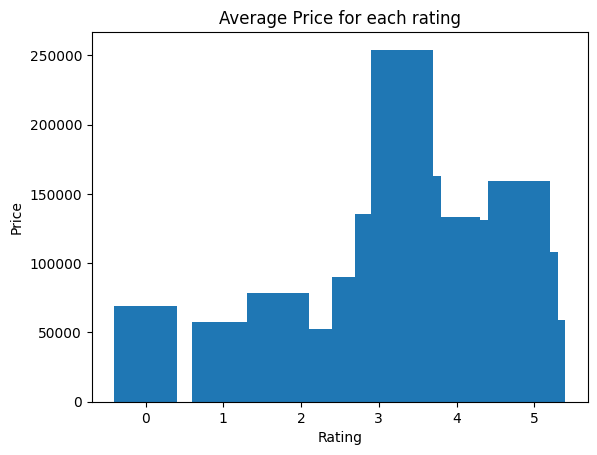

In [186]:
avg_price = rating_price.groupby("vendor_rating")["price"].mean()
# rate_count = rating_price.groupby("vendor_rating").count()
# Create a bar chart of average price vs rating
plt.bar(avg_price.index, avg_price.values)
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Average Price for each rating")
# plt.bar(rate_count)